# Fine-Tuning Model
How to evaluate trained models and optimize them. Introduction to several metrics along with a visualization technique for analyzing classification model performance using scikit-learn. You will also learn how to optimize classification and regression models through the use of hyperparameter tuning.

# Classification Model Evaluation – Notes

## 1. How Good Is Your Model?
- When solving classification problems, we often start by looking at **accuracy**.
- But accuracy isn’t always the best performance measure.

---

## 2. Accuracy and Its Limitations
- **Accuracy** = (Correct predictions) / (Total predictions).
- It works well when classes are balanced, but fails when they’re not.

---

## 3. Class Imbalance
- Example: Fraud detection where only 1% of transactions are fraudulent.
- A model predicting *all legitimate* would have 99% accuracy but zero fraud detection.
- This is a **class imbalance** problem: one class occurs much more than the other.

---

## 4. The Confusion Matrix
- A **2x2 table** used to evaluate binary classifiers.
- Layout:
  - Rows: Actual values
  - Columns: Predicted values

![confusion_matrix](images/sc1.png)

---

## 5–11. Components of the Confusion Matrix
- **True Positives (TP)**: Fraud correctly predicted as fraud.
- **True Negatives (TN)**: Legitimate correctly predicted as legitimate.
- **False Negatives (FN)**: Fraud incorrectly predicted as legitimate.
- **False Positives (FP)**: Legitimate incorrectly predicted as fraud.

---

## 12. Why Use the Confusion Matrix?
- Provides more detailed performance insight than simple accuracy
- Enables computation of multiple metrics:
  - **Accuracy**: The proportion of correct predictions  
    ![accuracy](images/sc2.png)
  - Plus other more nuanced metrics like precision, recall, etc.

---

## 13. Precision
- **Precision** = TP / (TP + FP)
- Also called **Positive Predictive Value**.
- High precision = Fewer false fraud alarms.
![precision](images/sc3.png)

---

## 14. Recall (Sensitivity)
- **Recall** = TP / (TP + FN)
- Measures how well we catch frauds.
- High recall = Fewer missed frauds.
![recall](images/sc4.png)

---

## 15. F1 Score
- **F1 Score** = Harmonic mean of precision and recall.
- Balanced metric when both false positives and false negatives matter.
- Good when precision and recall need to be equally high.
F1 score = 2 * (precision * recall) / (precision + recall)
---

## 16. Confusion Matrix in scikit-learn
- Use `confusion_matrix` and `classification_report` from `sklearn.metrics`.
- Example workflow:
  1. Split dataset
  2. Fit classifier
  3. Predict
  4. Evaluate with confusion matrix

---

## 17. scikit-learn Example
- `confusion_matrix(y_test, y_pred)` → Outputs matrix.
- `classification_report(y_test, y_pred)` → Outputs precision, recall, F1, and support.

---

## 18. Understanding the Output
- Example:
  - Churn class:
    - Precision: 0.76
    - Recall: 0.16 → poor at identifying actual churns.
- **Support**: Number of true instances for each class.

---

## 19. Practice
- Next step: Practice evaluating a model using the **diabetes dataset**.

---


In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
data = pd.read_csv(r"dataset\diabetes.csv")

# Separate features and target variable
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Create train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Train features shape: (537, 8)
Test features shape: (231, 8)


In [2]:
# Import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231




# 📘 Logistic Regression & ROC Curve

## 🔍 Logistic Regression Overview
- Despite its name, **logistic regression** is used for **binary classification**.
- It calculates the **probability `p`** that an observation belongs to the positive class:
  - If `p ≥ 0.5`, label = 1 (positive class, e.g., has diabetes)
  - If `p < 0.5`, label = 0 (negative class)

## 📏 Linear Decision Boundary
- Logistic regression results in a **linear decision boundary** between classes.
![decision boundary](images/sc5.png)

## 🛠️ Logistic Regression in scikit-learn
```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
````

## 📈 Predicting Probabilities

```python
y_pred_probs = model.predict_proba(X_test)[:, 1]
```

* `.predict_proba()` returns probabilities for both classes.
* Use the second column `[1]` for positive class probabilities.

## 🔧 Probability Thresholds

* Default threshold: `0.5`
* Can vary threshold to control sensitivity vs. specificity.

## 📉 ROC Curve (Receiver Operating Characteristic)

* Plots **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)** at various thresholds.
* Key points:

  * Threshold = 0 → Predicts all positives
  * Threshold = 1 → Predicts all negatives
![roc curve](images/sc6.png)
```python
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
```

## 📊 AUC (Area Under the Curve)

* AUC ranges from `0` (worst) to `1` (best).
* AUC of `0.67` means 67% of the time, the model ranks a random positive higher than a random negative.

```python
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_probs)
```

## ✅ Summary

* Logistic regression outputs probabilities for binary classes.
* ROC curve helps evaluate performance across thresholds.
* **AUC** is a threshold-independent performance metric.


In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000) # default is 100 but our data needs for iterations try running this without max_iter

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])


[0.26654964 0.19014779 0.12360643 0.14565843 0.50458307 0.45330212
 0.01328034 0.59611268 0.56324748 0.79991604]


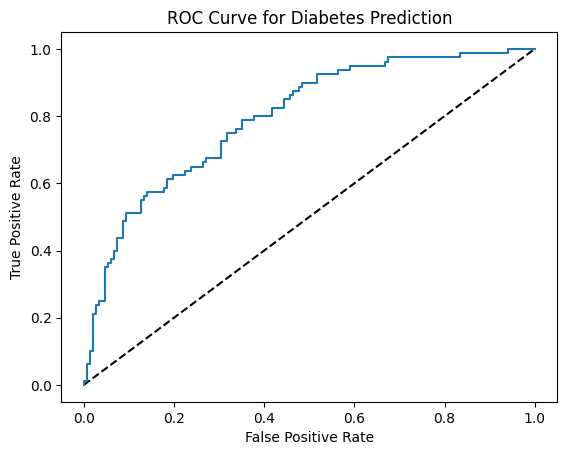

In [6]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()


In [7]:
# Import necessary functions
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, logreg.predict(X_test)))

# Calculate the classification report
print(classification_report(y_test, logreg.predict(X_test)))


0.7966059602649006
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

